In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.api import qqplot, add_constant
from sklearn.tree import export_graphviz
import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from statsmodels.api import qqplot
import matplotlib as mpl
import statsmodels.api as sm
import pydotplus
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./Car.csv", encoding = 'euc=kr')

In [3]:
def fun_data_layout(v_data):
    print("Data 구조 : ", v_data.shape)
    print()
    
    print('변수 : ', v_data.columns)
    print()

In [4]:
# 데이터의 구조 확인
fun_data_layout(df_raw)

Data 구조 :  (7253, 13)

변수 :  Index(['Name', 'Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price'],
      dtype='object')



# Data Processing

In [5]:
df_raw['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

이름의 경우 최대값이 55이므로 전체데이터 7253개에 비해 너무 적어 이름에 따른 예측이 어려울 것으로 판단된다.

따라서 이름에서 브랜드만 따로 분리한 수 데이터의 개수를 확인한다

In [6]:
df_raw['Name'] = df_raw['Name'].str.split().str.get(0)
df_raw.rename(columns={'Name': 'Brand'}, inplace=True)
df_raw['Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

이름에서 브랜드만 추출했을 경우 최대값이 1444이므로 전체데이터 7253개에 비해 의미있게 큰 수치가 나왔다.

In [7]:
df_raw['Location'].value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

#### - 단위와 같이 포현되어 있는 수치형 변수 처리

In [8]:
# 단위와 표현되어 있는 수치형 변수 처리
df_raw['Mileage'] = df_raw['Mileage'].str.replace('kmpl', '')

# 이거 왜 하는지 모르겟음 
#df_raw['Mileage'] = df_raw['Mileage'].str.replace('kmpl', '')
df_raw['Engine'] = df_raw['Engine'].str.replace('CC', '')
df_raw['Power'] = df_raw['Power'].str.replace('bhp', '')

In [9]:
df_raw['Mileage'] = df_raw['Mileage'].str.replace('null', '0')
df_raw['Engine'] = df_raw['Engine'].str.replace('null', '0')
df_raw['Power'] = df_raw['Power'].str.replace('null', '0')

In [10]:
# New_Price 삭제
df_raw.drop(columns = ["New_Price"], inplace = True)

#### - Data Type  확인 및 변경

In [11]:
df_raw.dtypes

Brand                 object
Location              object
Price                float64
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [12]:
# object data tyoe을 float data type 으로 변경
df_raw['Mileage'] = df_raw['Mileage'].astype('float')
df_raw['Engine'] = df_raw['Engine'].astype('float')
df_raw['Power'] = df_raw['Power'].astype('float')

In [13]:
# data type 재확인
df_raw.dtypes

Brand                 object
Location              object
Price                float64
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object

#### - 결측치 확인 및 처리

In [14]:
df_raw.isnull().sum()

Brand                   0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
dtype: int64

In [15]:
# data가 0인 data 처리
df_raw.loc[df_raw.Mileage == 0, 'Mileage'] = np.nan
df_raw.loc[df_raw.Engine == 0, 'Engine'] = np.nan
df_raw.loc[df_raw.Power == 0, 'Power'] = np.nan

In [16]:
# 결측치에 대해 평균값으로 대체 처리
df_raw['Mileage'] = df_raw['Mileage'].fillna(df_raw['Mileage'].mean())
df_raw['Engine'] = df_raw['Engine'].fillna(df_raw['Engine'].mean())
df_raw['Power'] = df_raw['Power'].fillna(df_raw['Power'].mean())
df_raw['Seats'] = df_raw['Seats'].fillna(df_raw['Seats'].mean())

In [17]:
# Price 결측치 제거 : Brand, 자동차 제원치가 다양하여 제거 결정
df_raw.dropna(inplace = True)

In [18]:
df_raw.isnull().sum()

Brand                0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 7236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              6200 non-null   object 
 1   Location           6200 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               6200 non-null   int64  
 4   Kilometers_Driven  6200 non-null   int64  
 5   Fuel_Type          6200 non-null   object 
 6   Transmission       6200 non-null   object 
 7   Owner_Type         6200 non-null   object 
 8   Mileage            6200 non-null   float64
 9   Engine             6200 non-null   float64
 10  Power              6200 non-null   float64
 11  Seats              6200 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 629.7+ KB


In [20]:
df_raw.isnull().sum()

Brand                0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

#### - 파생변수 생성

In [21]:
# Car_Year 변수 파생 : 현재 연도와 나이 열을 새로 생성, 현재 연도는 2023년이고 
# 연령 열은 자동차 나이= 현재연도 - 모델의 년도
df_raw['Now'] = 2023
df_raw['Car_Year'] = df_raw['Now'] - df_raw['Year']
df_raw.drop(columns = ['Now'], axis = 1, inplace = True)
df_raw.drop(columns = ['Year'], axis = 1, inplace = True)
df_raw.head()

,Brand,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Year
0,Maruti,Mumbai,2682.68,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,13
1,Hyundai,Pune,19162.00,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,8
2,Honda,Chennai,6898.32,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,12
3,Maruti,Chennai,9197.76,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11
4,Audi,Coimbatore,27194.71,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,10


In [22]:
# 연식 대비 주행거리 : 연식/주행거리
df_raw['Distance_Year'] = df_raw['Kilometers_Driven'] / df_raw['Car_Year']

In [23]:
# 배기량과 마력(Engine, Power) 간 피어슨 상관 계수 계산
correlation_matrix = df_raw[['Engine', 'Power']].corr()
correlation_coefficient = correlation_matrix.iloc[0, 1]

# 결과 출력
print("상관 계수:", correlation_coefficient)

상관 계수: 0.8585913157382871


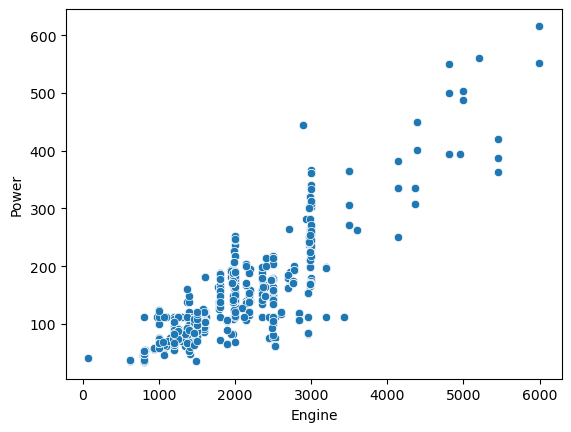

In [24]:
sns.scatterplot(x='Engine', y='Power', data=df_raw)
plt.show(sns)

두 개의 설명변수 간 상관계수가 높은 경우 다중공선성(multicollinearity)이 발생할 수 있다.

다중공선성은 회귀 분석에서 변수 간의 높은 상관 관계로 인해 모델의 성능과 해석력이 저하되는 문제이다. 

자료조사 결과 배기량은 엔진에서 피스톤이 한번 움직일 때 더 많은 부피를 밀어내거나 빨아드리는 부피이고 마력은 차가 낼 수 있는 힘, '출력'을 의미한다. 대체적으로 배기량이 크면 마력도 높다는 것을 알게 되었다. 

다중공선성을 해결하기 위해 변수 결합, 주성분분석, Lasso회귀 등이 있지만 추후 VIF를 통해 확인 요망


#### - 이상치 제거

In [25]:
df_raw.describe()

,Price,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Year,Distance_Year
count,6200.000000,6.200000e+03,6200.000000,6200.000000,6200.000000,6200.000000,6200.000000,6.200000e+03
mean,14912.514750,5.815738e+04,18.384720,1619.983814,113.300417,5.278508,9.565806,6.161636e+03
std,17674.318464,9.010627e+04,4.156986,599.744181,53.540989,0.805628,3.271969,1.413696e+04
min,7.080000,1.710000e+02,6.400000,72.000000,34.200000,0.000000,4.000000,4.275000e+01
25%,5365.360000,3.300000e+04,15.400000,1198.000000,77.750000,5.000000,7.000000,3.887369e+03
50%,8814.520000,5.251450e+04,18.346527,1493.000000,98.600000,5.000000,9.000000,5.526249e+03
75%,15869.972500,7.227750e+04,21.100000,1968.000000,138.030000,5.000000,11.000000,7.418143e+03
max,245273.600000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,25.000000,1.083333e+06


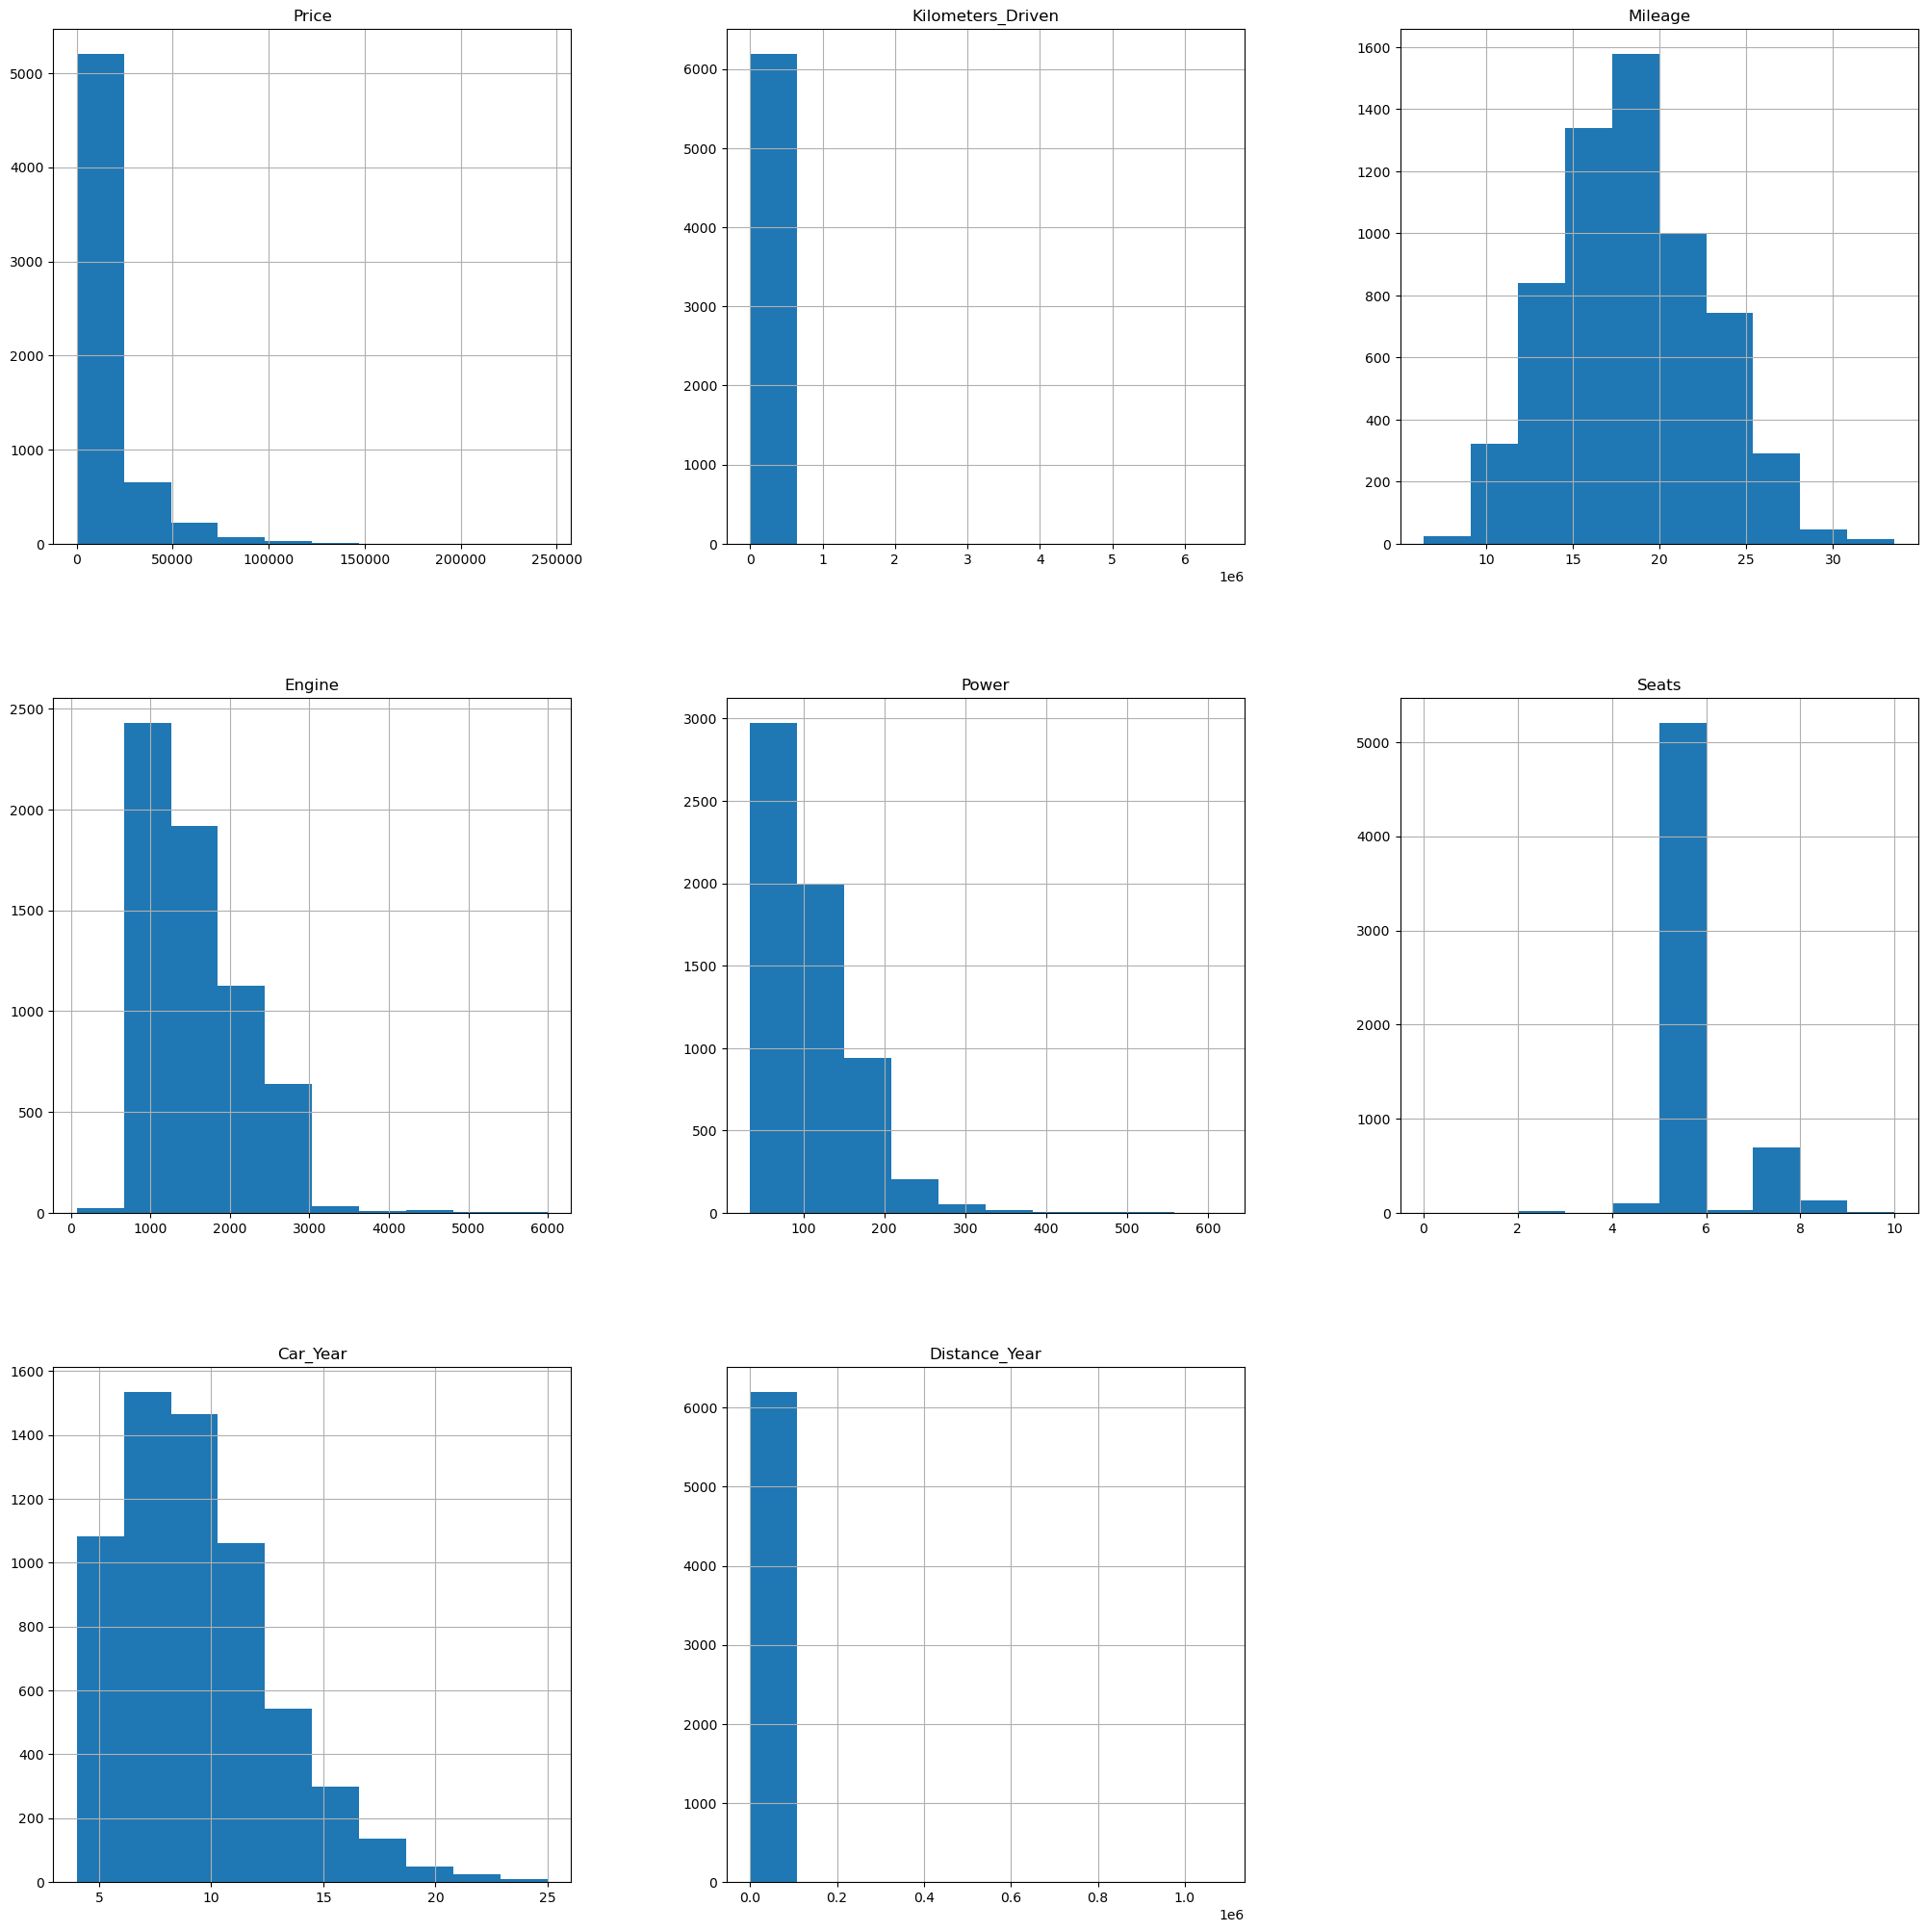

In [26]:
df_raw.hist(figsize = (25, 25))
plt.show()

- Location의 경우 0과 1(인구밀도가 높은 지역)이 비슷한 수준이다.

- 목표변수인 Price의 max값은 2.45억원으로 평균인 1.49와 차이를 보인다.

- Fuel type은 0(diesel,petrol)이 압도적으로 높으며, 나머지 type은 수가 매우 적다

- Transmission의 경우 1(Manual)이 0보다 2배 정도 높은 모습을 보인다.

- Owner_Type의 경우 1(first)가 0보다 5배 정도 높다.

- Mileage는 거의 정규분포와 유사한 분포를 보인다.

- Engine은 왼쪽으로 치우쳐져 있고 오른쪽에 특이치가 있음을 확인할 수 있다.

- Distance_Year 연식 대비 주행거리는 4년차부터 25년까지로 왼쪽에 약간 치우친 모습을 보인다.

In [27]:
# 목표변수(Price) 이상치 확인

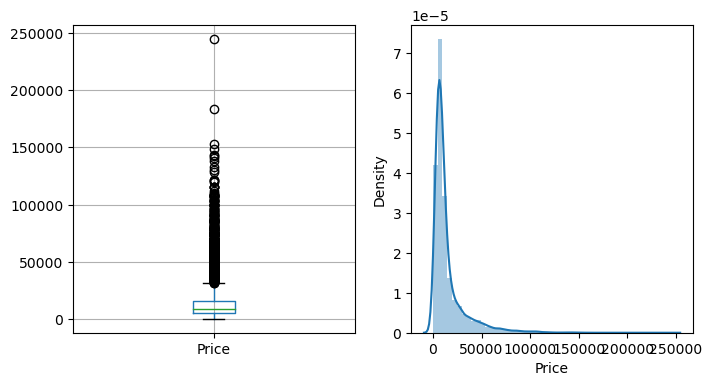

In [28]:
# Price 분포 확인
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 첫 번째 서브플롯 (박스플롯)
df_raw.boxplot('Price', ax=axes[0])

# 두 번째 서브플롯 (분포도)
sns.distplot(df_raw['Price'], ax=axes[1])

# 그래프 보여주기
plt.show()

+ price에 이상치가 존재 한다. 150000 이상은 이상치로 처리하기로 결정한다

In [29]:
# Price 가 1.5억원 이상이면 제외한다
df_raw = df_raw[df_raw['Price'] < 150000]
df_raw.reset_index(drop=True, inplace=True)
df_raw.head(5)

,Brand,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Year,Distance_Year
0,Maruti,Mumbai,2682.68,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,13,5538.461538
1,Hyundai,Pune,19162.00,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,8,5125.000000
2,Honda,Chennai,6898.32,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,12,3833.333333
3,Maruti,Chennai,9197.76,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11,7909.090909
4,Audi,Coimbatore,27194.71,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,10,4067.000000


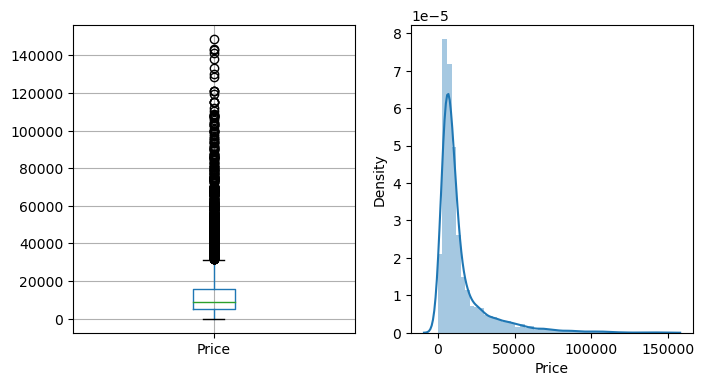

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 첫 번째 서브플롯 (박스플롯)
df_raw.boxplot('Price', ax=axes[0])

# 두 번째 서브플롯 (분포도)
sns.distplot(df_raw['Price'], ax=axes[1])

# 그래프 보여주기
plt.show()

In [31]:
df_raw.describe()

,Price,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Year,Distance_Year
count,6197.000000,6.197000e+03,6197.000000,6197.000000,6197.000000,6197.000000,6197.000000,6.197000e+03
mean,14825.732879,5.817916e+04,18.388420,1618.638477,113.144987,5.279611,9.566242,6.163698e+03
std,17212.147989,9.012245e+04,4.154033,596.359104,53.008341,0.803658,3.272241,1.414003e+04
min,7.080000,1.710000e+02,7.500000,72.000000,34.200000,0.000000,4.000000,4.275000e+01
25%,5365.360000,3.300000e+04,15.400000,1198.000000,77.000000,5.000000,7.000000,3.888889e+03
50%,8814.520000,5.255300e+04,18.346527,1493.000000,98.600000,5.000000,9.000000,5.528909e+03
75%,15804.820000,7.235100e+04,21.100000,1968.000000,138.030000,5.000000,11.000000,7.420571e+03
max,148804.430000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,25.000000,1.083333e+06


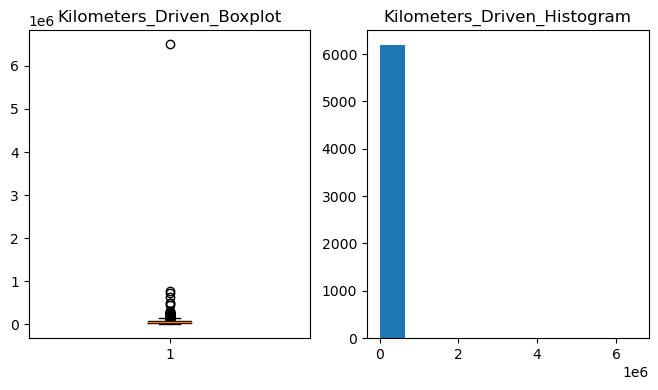

In [32]:
# 설명변수 중 이상치 확인 및 처리
plt.figure(figsize=(8, 4))

# 첫 번째 서브플롯 (박스플롯)
plt.subplot(1, 2, 1)
plt.boxplot(data = df_raw, x = 'Kilometers_Driven')
plt.title("Kilometers_Driven_Boxplot")

# 두 번째 서브플롯 (히스토그램)
plt.subplot(1, 2, 2)
plt.hist(data = df_raw, x = 'Kilometers_Driven', bins=10)
plt.title("Kilometers_Driven_Histogram")

plt.show()

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

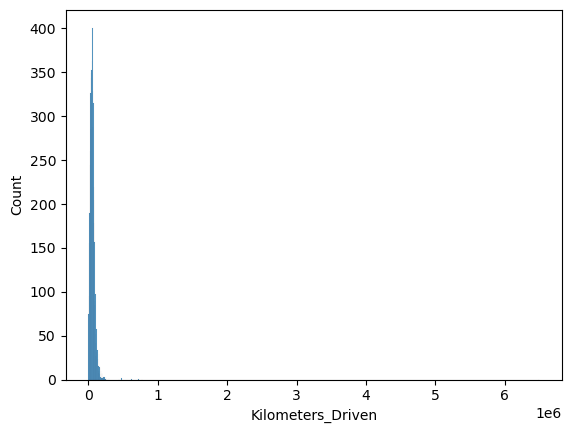

In [33]:
# # Kilometers_Driven 변수가 9000 이상 제외하려 했으나 그럴 경우 Onwer_Type이 First말고 나머지가 다 삭제되서 취소하였다.
# df_raw = df_raw[df_raw['Kilometers_Driven'] < 9000]
# df_raw.reset_index(drop=True, inplace=True)
sns.histplot(df_raw, x = "Kilometers_Driven")

In [34]:
df_raw['Owner_Type'].value_counts()

First             5093
Second             983
Third              112
Fourth & Above       9
Name: Owner_Type, dtype: int64

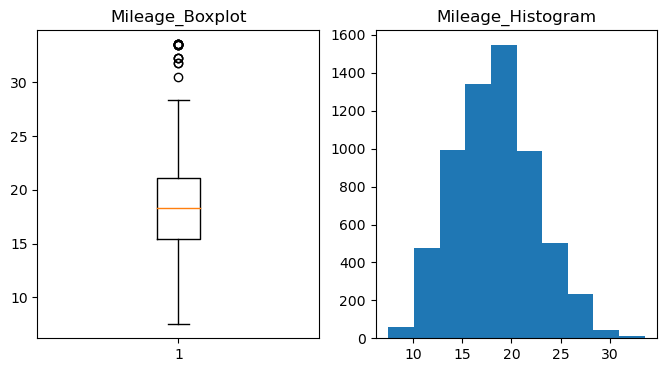

In [35]:

# 설명변수 중 이상치 확인 및 처리
plt.figure(figsize=(8, 4))

# 첫 번째 서브플롯 (박스플롯)
plt.subplot(1, 2, 1)
plt.boxplot(data = df_raw, x = 'Mileage')
plt.title("Mileage_Boxplot")

# 두 번째 서브플롯 (히스토그램)
plt.subplot(1, 2, 2)
plt.hist(data = df_raw, x = 'Mileage', bins=10)
plt.title("Mileage_Histogram")

plt.show()

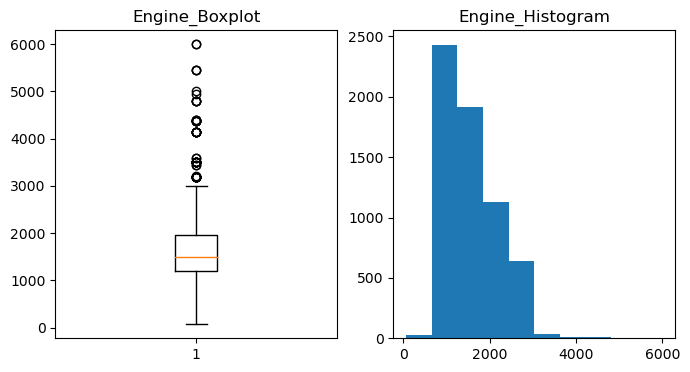

In [36]:
# 설명변수 중 이상치 확인 및 처리
plt.figure(figsize=(8, 4))

# 첫 번째 서브플롯 (박스플롯)
plt.subplot(1, 2, 1)
plt.boxplot(data = df_raw, x = 'Engine')
plt.title("Engine_Boxplot")

# 두 번째 서브플롯 (히스토그램)
plt.subplot(1, 2, 2)
plt.hist(data = df_raw, x = 'Engine', bins=10)
plt.title("Engine_Histogram")

plt.show()

<Axes: xlabel='Engine', ylabel='Count'>

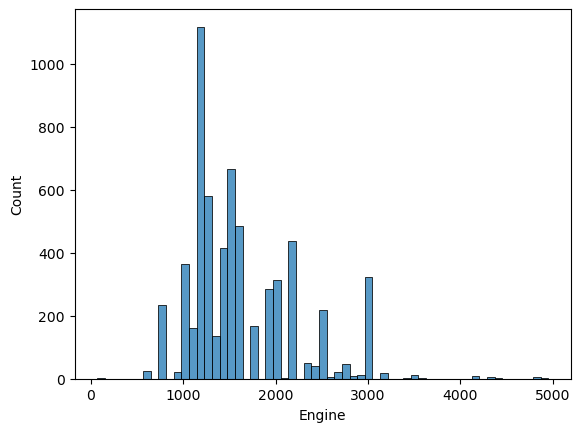

In [37]:
# Engine 변수가 5000 이상 제외
df_raw = df_raw[df_raw['Engine'] < 5000]
df_raw.reset_index(drop=True, inplace=True)
sns.histplot(df_raw, x = "Engine")

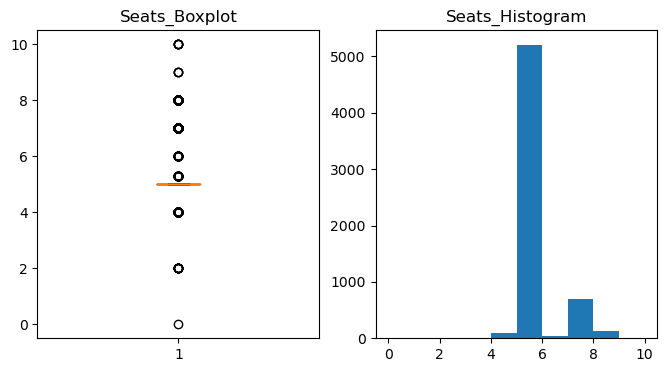

In [38]:
# 설명변수 중 이상치 확인 및 처리
plt.figure(figsize=(8, 4))

# 첫 번째 서브플롯 (박스플롯)
plt.subplot(1, 2, 1)
plt.boxplot(data = df_raw, x = 'Seats')
plt.title("Seats_Boxplot")

# 두 번째 서브플롯 (히스토그램)
plt.subplot(1, 2, 2)
plt.hist(data = df_raw, x = 'Seats', bins=10)
plt.title("Seats_Histogram")

plt.show()

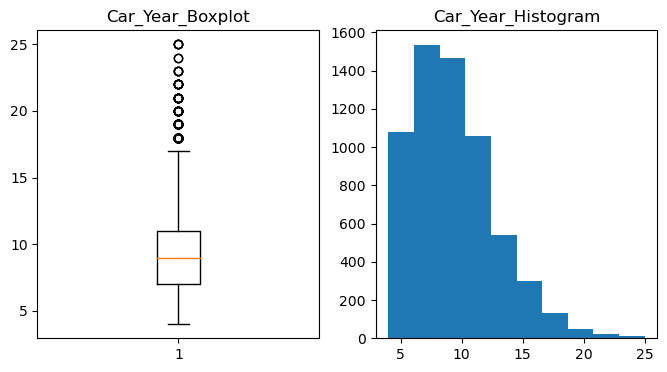

In [39]:
# 설명변수 중 이상치 확인 및 처리
plt.figure(figsize=(8, 4))

# 첫 번째 서브플롯 (박스플롯)
plt.subplot(1, 2, 1)
plt.boxplot(data = df_raw, x = 'Car_Year')
plt.title("Car_Year_Boxplot")

# 두 번째 서브플롯 (히스토그램)
plt.subplot(1, 2, 2)
plt.hist(data = df_raw, x = 'Car_Year', bins=10)
plt.title("Car_Year_Histogram")

plt.show()

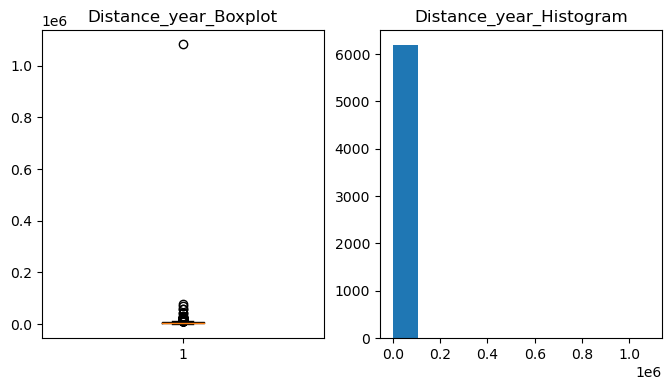

In [40]:
# 설명변수 중 이상치 확인 및 처리
plt.figure(figsize=(8, 4))

# 첫 번째 서브플롯 (박스플롯)
plt.subplot(1, 2, 1)
plt.boxplot(data = df_raw, x = 'Distance_Year')
plt.title("Distance_year_Boxplot")

# 두 번째 서브플롯 (히스토그램)
plt.subplot(1, 2, 2)
plt.hist(data = df_raw, x = 'Distance_Year', bins=10)
plt.title("Distance_year_Histogram")

plt.show()

# 그래프 분석 및 통계적 가설 검정

## 1. 범주형 설명변수에 따른 가격차이

### 1) 브랜드별 가격차이

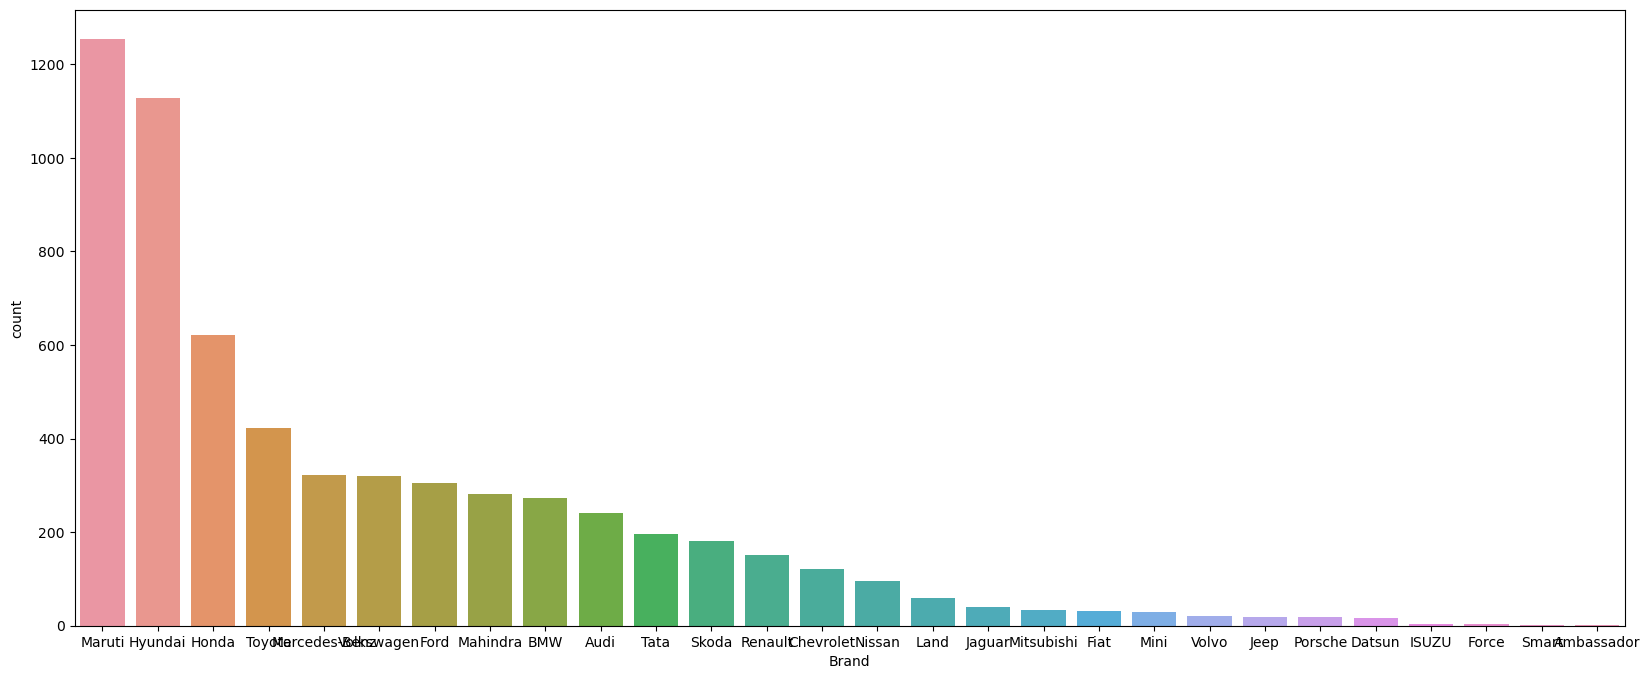

In [41]:
plt.figure(figsize = (20,8))
sns.countplot(x="Brand", data = df_raw, order = df_raw["Brand"].value_counts().index)
plt.show()

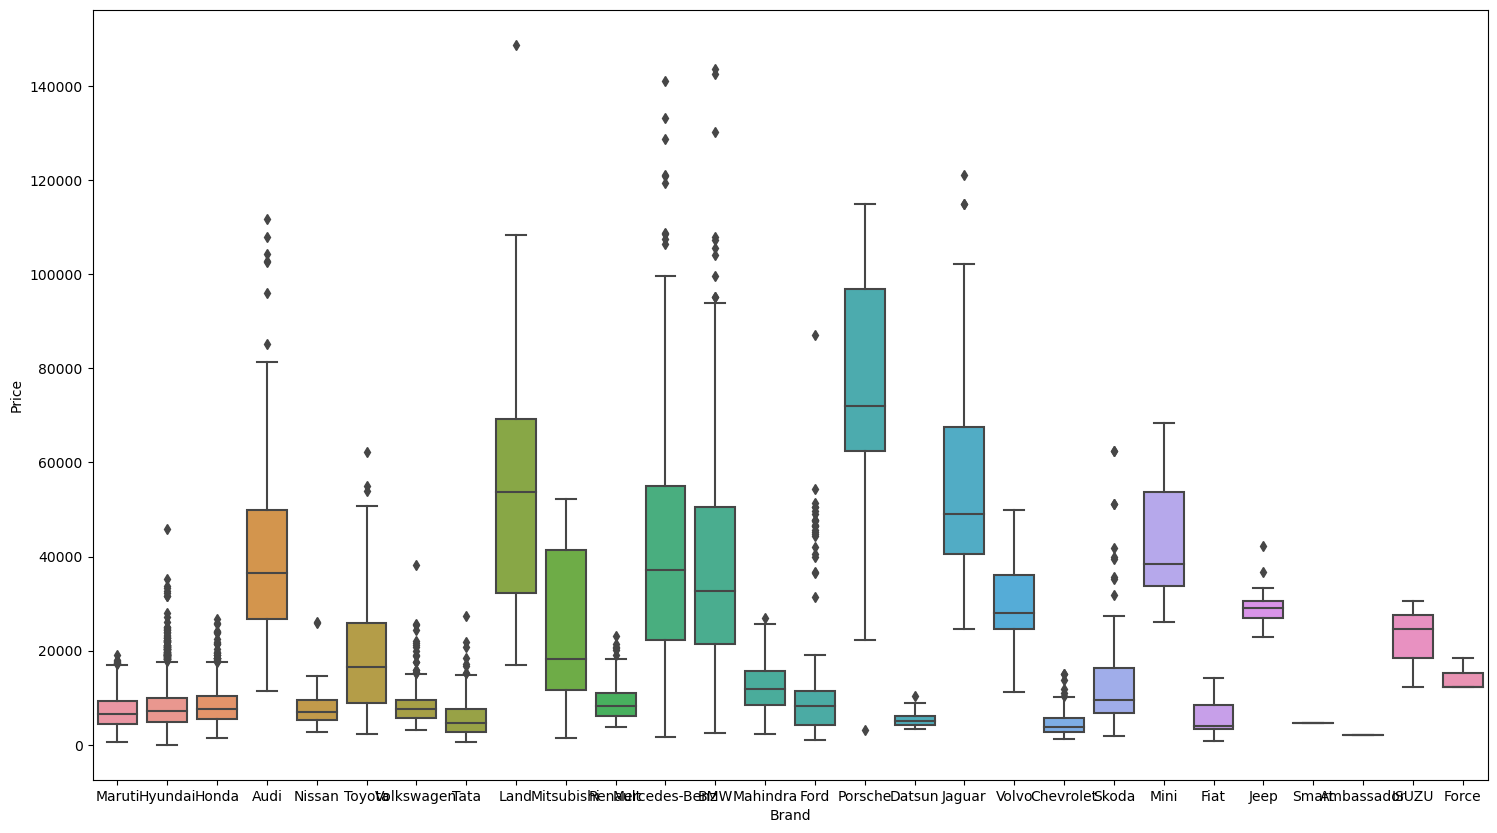

In [42]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(x='Brand', y='Price', data=df_raw)
plt.show(sns)

In [43]:
# Location에 따른 Price 평균 계산
loc_mean = df_raw.groupby('Location')['Price'].mean()
print("Location에 따른 Price 평균 계산  :  \n", loc_mean, '\n')

# Fuel_Type에 따른 Price 평균 계산
fuel_mean = df_raw.groupby('Fuel_Type')['Price'].mean()
print("Fuel_Type에 따른 Price 평균 계산  :  \n", fuel_mean, '\n')

# Owner_Type에 따른 Price 평균 계산
owner_mean = df_raw.groupby('Owner_Type')['Price'].mean()
print("Owner_Type에 따른 Price 평균 계산  :  \n", owner_mean, '\n')

# Transmission에 따른 Price 평균 계산
trans_mean = df_raw.groupby('Transmission')['Price'].mean()
print("Transmission에 따른 Price 평균 계산  :  \n", trans_mean, '\n')

Location에 따른 Price 평균 계산  :  
 Location
Ahmedabad     13796.770901
Bangalore     20131.058485
Chennai       11901.071166
Coimbatore    23619.052398
Delhi         15047.089457
Hyderabad     14810.968638
Jaipur         9121.473632
Kochi         17285.517648
Kolkata        8978.017091
Mumbai        15030.456781
Pune          10615.748149
Name: Price, dtype: float64 

Fuel_Type에 따른 Price 평균 계산  :  
 Fuel_Type
CNG          5421.837193
Diesel      20073.878806
Electric    19736.860000
LPG          3812.472000
Petrol       8802.832360
Name: Price, dtype: float64 

Owner_Type에 따른 Price 평균 계산  :  
 Owner_Type
First             15586.228218
Fourth & Above     5028.108889
Second            11646.323670
Third              6102.002143
Name: Price, dtype: float64 

Transmission에 따른 Price 평균 계산  :  
 Transmission
Automatic    30684.729076
Manual        8380.127271
Name: Price, dtype: float64 



### 2) 연료별로 가격 차이

<Axes: xlabel='Fuel_Type', ylabel='Price'>

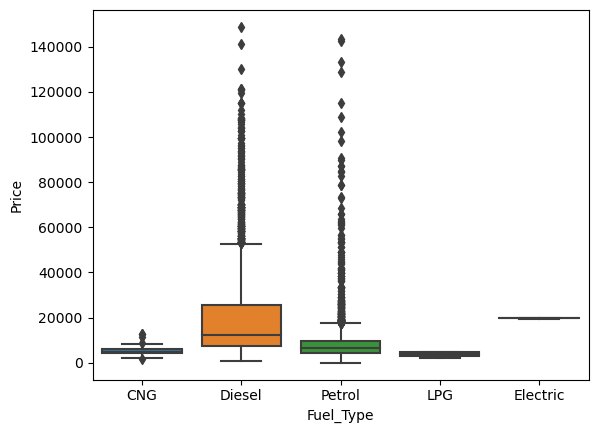

In [44]:
sns.boxplot(x='Fuel_Type', y='Price', data=df_raw)

In [45]:
df_raw['Fuel_Type'].value_counts()

Diesel      3300
Petrol      2822
CNG           57
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [46]:
# 연료 종류별 데이터 추출
fuel_1 = df_raw[df_raw['Fuel_Type'] == 'Diesel']['Price']
fuel_2 = df_raw[df_raw['Fuel_Type'] == 'Petrol']['Price']


# ANOVA 분석 수행하기
f_statistic, p_value = stats.f_oneway(fuel_1, fuel_2)

print("F-statistic: {:.3f}".format(f_statistic))
print("p-value: {:.15f}".format(p_value))

F-statistic: 735.039
p-value: 0.000000000000000


### 3) 소유권에 따른 가격 차이

<Axes: xlabel='Owner_Type', ylabel='Price'>

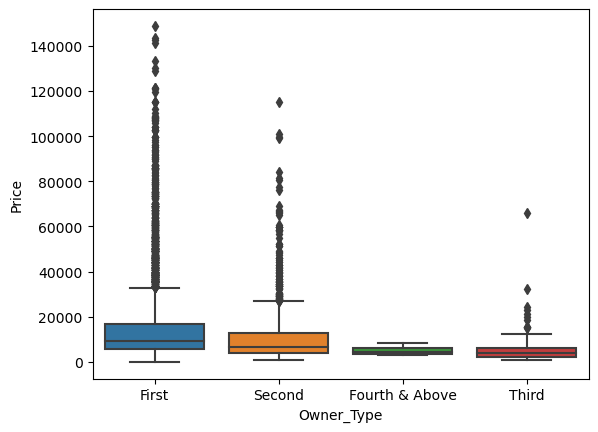

In [47]:
sns.boxplot(x='Owner_Type', y='Price', data=df_raw)

In [48]:
df_raw['Owner_Type'].value_counts()

First             5089
Second             981
Third              112
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [49]:
# 소유권별 데이터 추출
owner_1 = df_raw[df_raw['Owner_Type'] == 'First']['Price']
owner_2 = df_raw[df_raw['Owner_Type'] == 'Second']['Price']
owner_3 = df_raw[df_raw['Owner_Type'] == 'Fourth & Above']['Price']
owner_4 = df_raw[df_raw['Owner_Type'] == 'Third']['Price']

# ANOVA 분석 수행하기
f_statistic, p_value = stats.f_oneway(owner_1, owner_2, owner_3, owner_4)

print("F-statistic: {:.3f}".format(f_statistic))
print("p-value: {:.15f}".format(p_value))

F-statistic: 25.663
p-value: 0.000000000000000


### 4) Location별 가격 차이

In [50]:
#높은 인구 밀도를 가진 지역 목록 생성 - 2023년 기준 인구 밀도 순위 1~5위
high_density_regions = ['Mumbai', 'Delhi', 'Chennai','Hyderabad' ,'Kolkata']

# 판별 함수 정의
def dense_region(row):
    if row in ['Mumbai', 'Delhi', 'Chennai','Hyderabad' ,'Kolkata']:
        return 'High_Dense'
    else:
        return 'Low_Dense'
    
df_raw['loc'] = df_raw['Location'].apply(dense_region)

<Axes: xlabel='loc', ylabel='Price'>

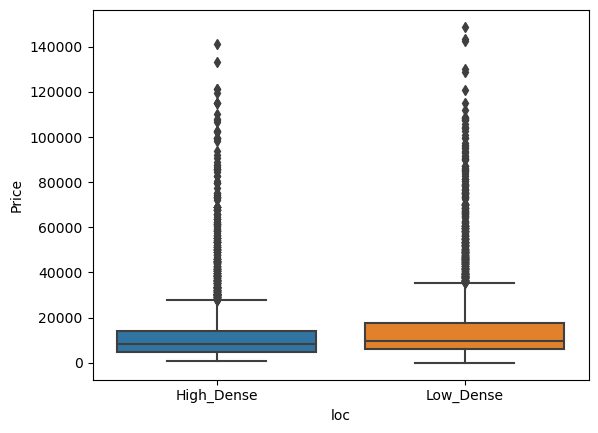

In [51]:
sns.boxplot(x='loc', y='Price', data=df_raw)

In [52]:
# Location이 0인 그룹과 1인 그룹으로 분리하기
loc_0 = df_raw[df_raw['loc'] == 'High_Dense']['Price']
loc_1 = df_raw[df_raw['loc'] == 'Low_Dense']['Price']

# 2 sample t-test
t_statistic, p_value = stats.ttest_ind(loc_0, loc_1)

print("T-statistic: {:.3f}".format(t_statistic))
print("p-value: {:.15f}".format(p_value))

df_raw = df_raw.drop('loc', axis = 1)


T-statistic: -6.345
p-value: 0.000000000237937


### 5) Transmission 별 가격 차이

<Axes: xlabel='Transmission', ylabel='Price'>

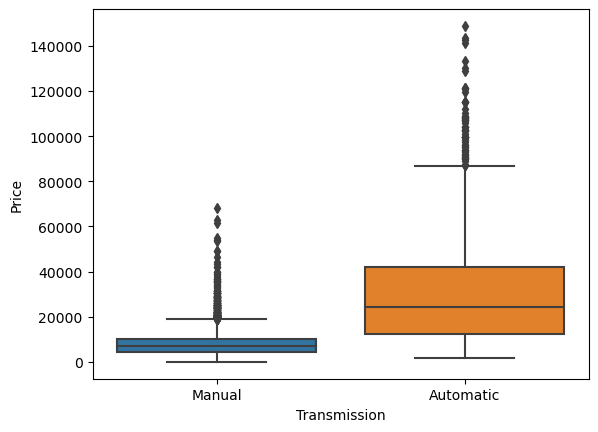

In [53]:
sns.boxplot(x='Transmission', y='Price', data=df_raw)

In [54]:
# Automatic그룹과 Manual그룹으로 분리하기
trans1 = df_raw[df_raw['Transmission'] == 'Automatic']['Price']
trans2 = df_raw[df_raw['Transmission'] == 'Manual']['Price']

# 2 sample t-test
t_statistic, p_value = stats.ttest_ind(trans1, trans2)

print("T-statistic: {:.3f}".format(t_statistic))
print("p-value: {:.15f}".format(p_value))


T-statistic: 57.504
p-value: 0.000000000000000


### 연속형

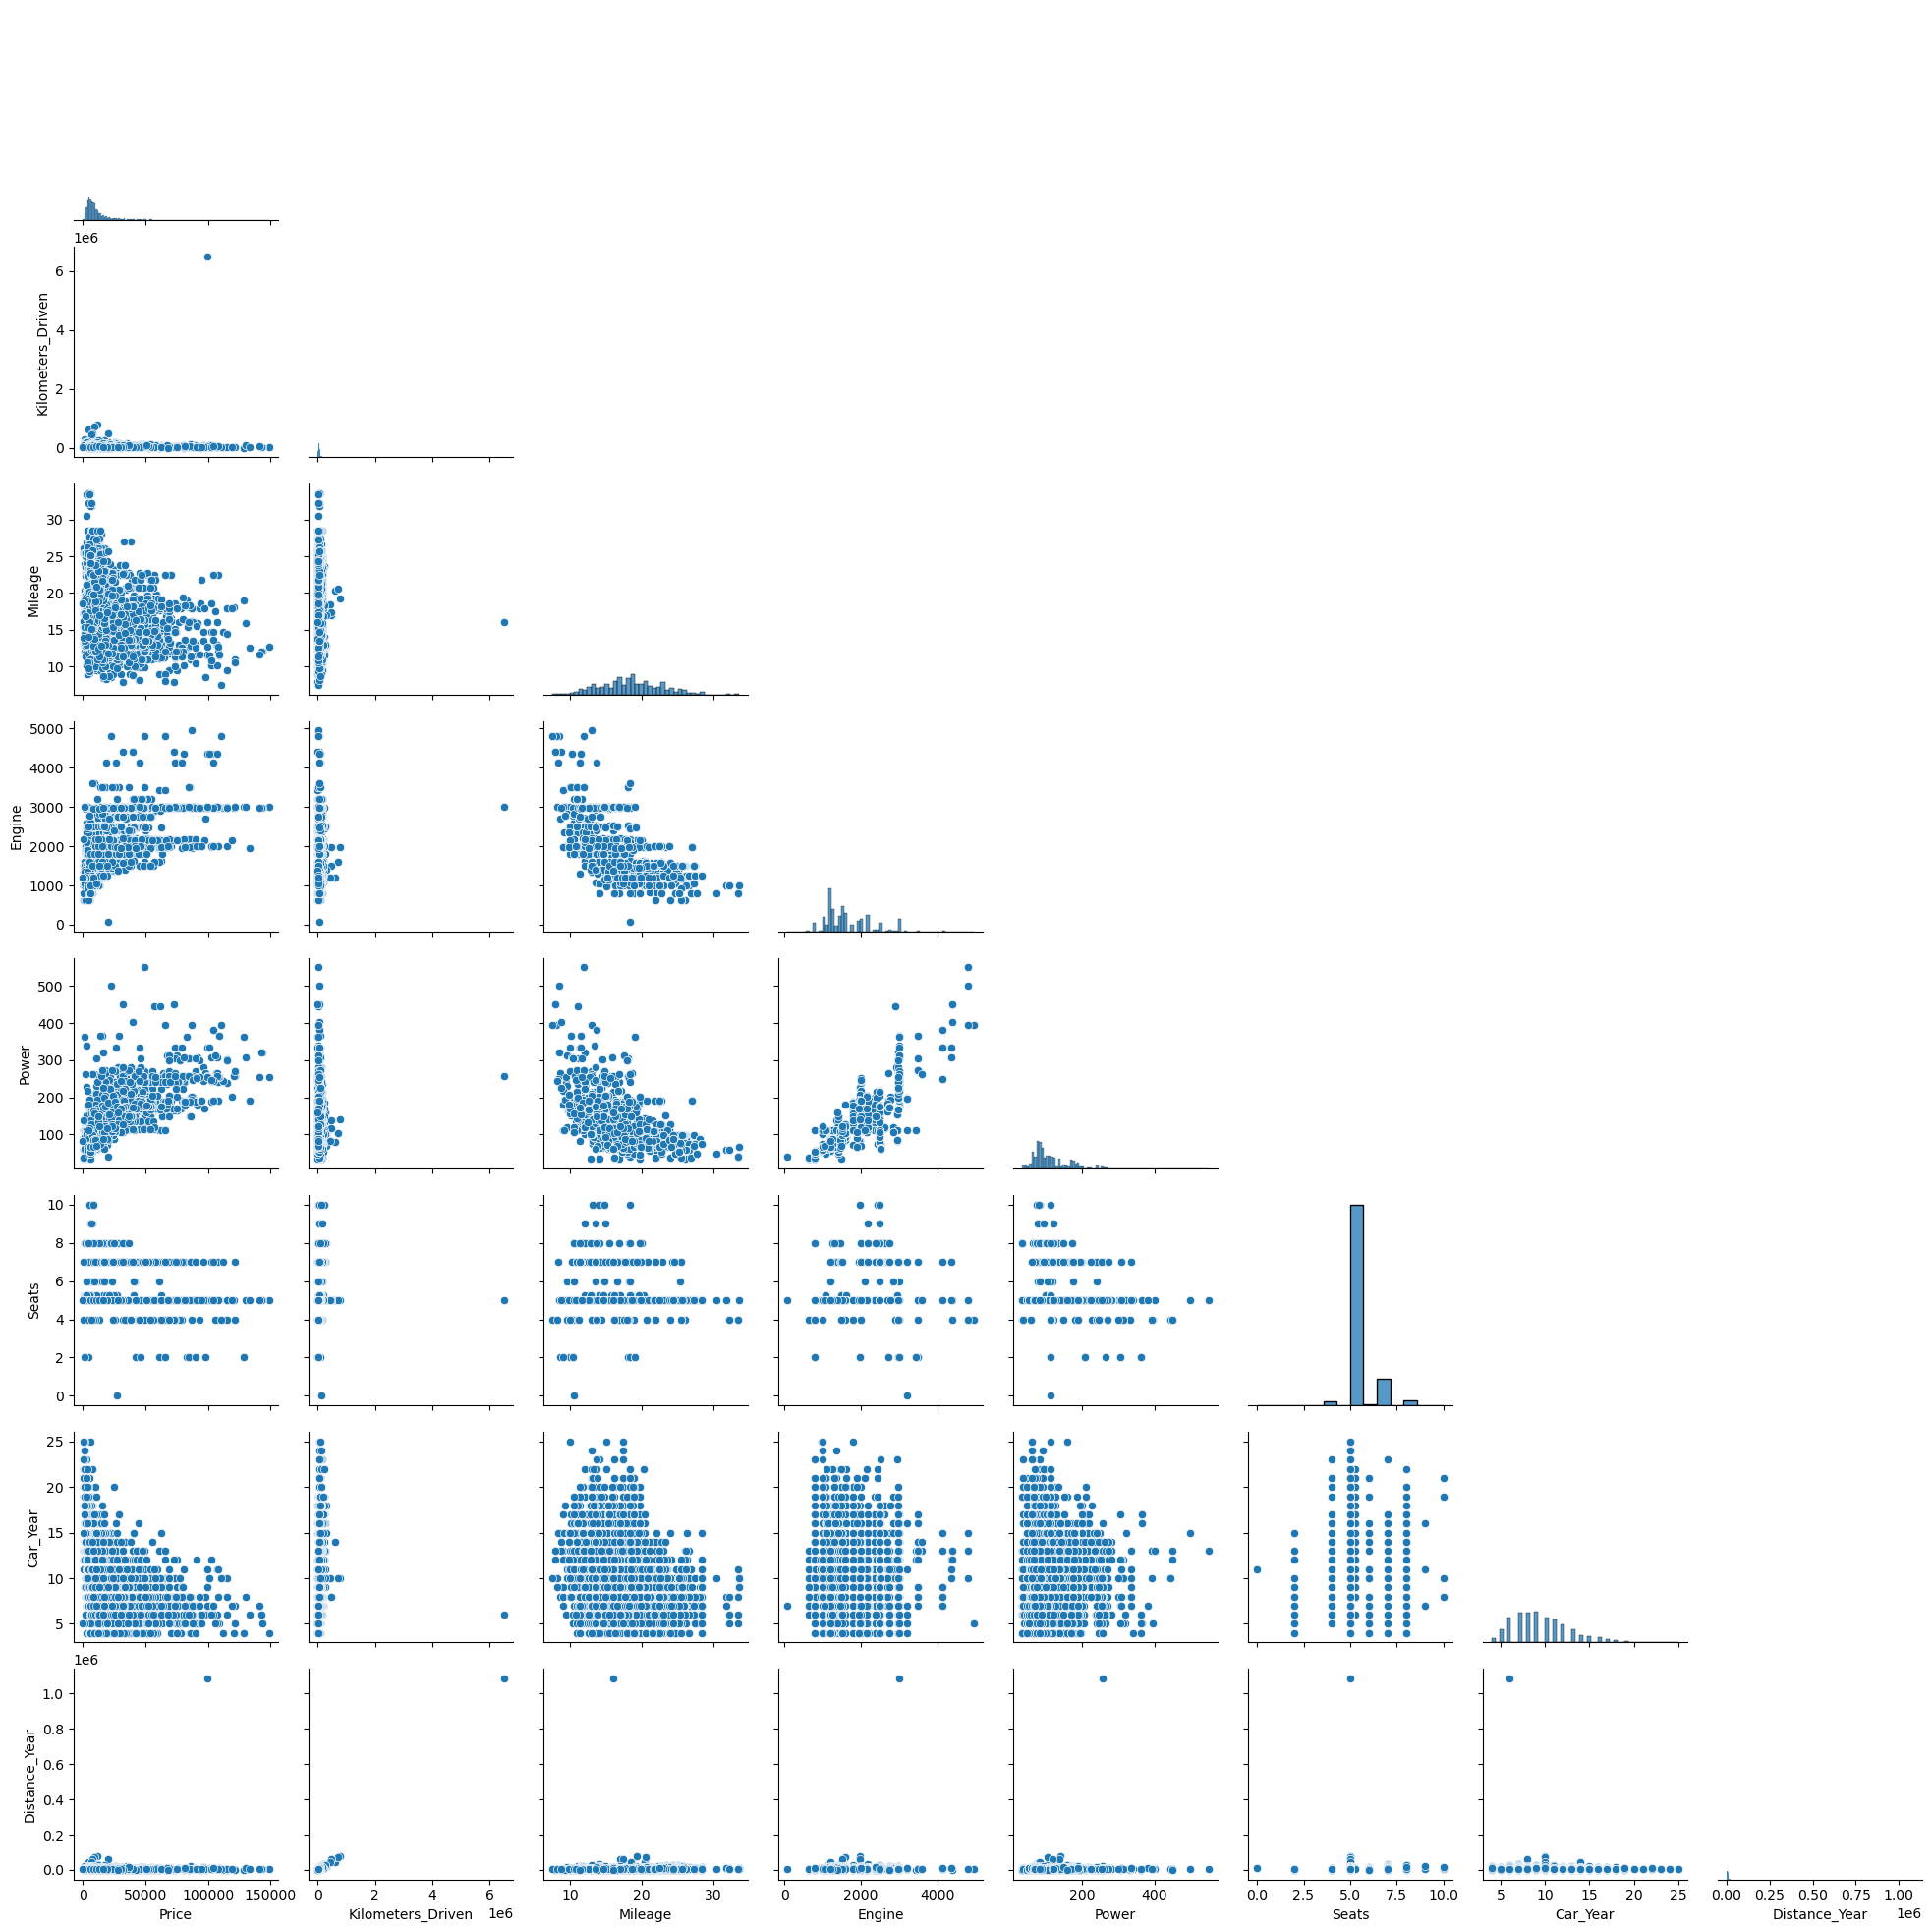

In [55]:
sns.pairplot(data = df_raw, corner = True)
plt.show()

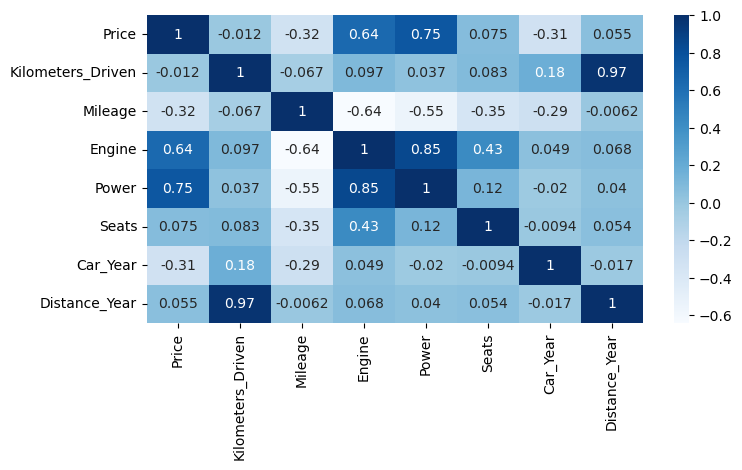

In [56]:
plt.figure(figsize = (8,4))
sns.heatmap(df_raw.corr(),annot= True, cmap= "Blues")
plt.show()

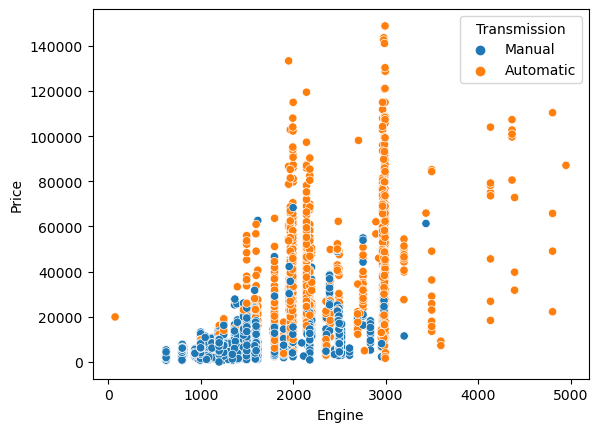

In [57]:
sns.scatterplot(x="Engine",y="Price", hue = "Transmission",data= df_raw)
plt.show()

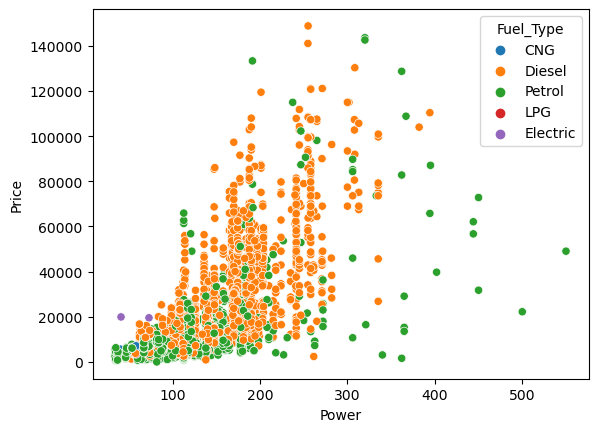

In [58]:
sns.scatterplot(x="Power",y="Price", hue = "Fuel_Type",data= df_raw)
plt.show()

# 모델 생성 : Linear Regression

#### 데이터 구성

In [59]:
# 범주형 연속변수의 더미화
df_dummy = pd.get_dummies(df_raw[["Location", "Fuel_Type", "Transmission","Owner_Type", "Brand"]])
df_reg = pd.concat([df_raw, df_dummy], axis = 1)
df_reg = df_reg.drop(["Location", "Fuel_Type", "Transmission","Owner_Type", "Brand"], axis = 1)

In [60]:
#회귀분석을 실행할 때 Benz와 Fourth의 경우 기호때문에 회귀분석이 되지 않아서 이름을 변경하였다.
df_reg.rename(columns = {df_reg.columns[46]:'Brand_Benz',df_reg.columns[27]:'Owner_Type_Fourth'}, inplace = True)
df_reg.rename(columns={'Brand_Mercedes-Benz': 'Brand_Benz','Owner_Type_Fourth & Above':"Owner_Type_Fourth" }, inplace=True)

In [61]:
# train, test data 분리
df_train, df_test = train_test_split(df_reg, test_size = 0.4, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (3714, 58)
test data size: (2477, 58)


In [62]:
 formula =  'Price ~  Kilometers_Driven +  Mileage +  Engine +  Power +  Seats +\
        Car_Year +  Location_Ahmedabad +  Location_Bangalore +\
        Location_Chennai +  Location_Coimbatore +  Location_Delhi +\
        Location_Hyderabad +  Location_Jaipur +  Location_Kochi +\
        Location_Kolkata +  Location_Mumbai +  Location_Pune +  Fuel_Type_CNG +\
        Fuel_Type_Diesel +  Fuel_Type_Electric +  Fuel_Type_LPG +\
        Fuel_Type_Petrol +  Transmission_Automatic +  Transmission_Manual +\
        Owner_Type_First +  Owner_Type_Fourth +  Owner_Type_Second +\
        Owner_Type_Third +  Brand_Ambassador +  Brand_Audi +  Brand_BMW +\
        Brand_Chevrolet +  Brand_Datsun +  Brand_Fiat +  Brand_Force +\
        Brand_Ford +  Brand_Honda +  Brand_Hyundai +  Brand_ISUZU +\
        Brand_Jaguar +  Brand_Jeep +  Brand_Land +  Brand_Mahindra +\
        Brand_Maruti +  Brand_Benz +  Brand_Mitsubishi +\
        Brand_Nissan +  Brand_Porsche +  Brand_Renault +  Brand_Skoda +\
        Brand_Smart +  Brand_Tata +  Brand_Toyota +  Brand_Volkswagen +\
        Brand_Volvo'

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     238.5
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        11:16:26   Log-Likelihood:                -38712.
No. Observations:                3714   AIC:                         7.752e+04
Df Residuals:                    3664   BIC:                         7.783e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.92

In [63]:
# 설명변수간의 다중공산성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('Price', axis = 1)

# statsmodels 의 상수항 추가 함수 적용
df_train_x_const = sm.add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values,i)
                for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
0,const,0.00
5,Seats,2.49
6,Car_Year,3.29
2,Mileage,3.94
4,Power,8.14
3,Engine,9.93
7,Distance_Year,73.59
1,Kilometers_Driven,75.83
42,Brand_Jeep,inf
41,Brand_Jaguar,inf


VIF(Variance Inflation Factor) 값이 inf가 되는 경우는, 분산 팽창 요인을 계산하는데 분모가 0이 되어 발생하는 오류입니다. 이 경우, 독립변수 간의 다중공선성이 매우 높아서 분산 팽창 요인이 매우 높아져서, 올바른 계산이 어려워지거나 불가능해집니다.

분산 팽창 요인은 다중공선성 문제를 나타내는 지표 중 하나입니다. 독립변수 간 상관성이 높을수록, 즉 다중공선성이 높을수록, VIF 값이 커집니다. 보통 VIF 값이 10을 넘으면 다중공선성이 매우 높은 것으로 판단됩니다.

따라서, VIF 값이 inf가 되는 경우에는 다중공선성이 매우 높다는 것을 의미합니다. 이 경우, 모델에서 해당 독립변수를 제외하거나 변수선택 방법을 이용하여 모델의 독립변수를 재설정하는 것이 좋습니다. 다중공선성 문제를 해결하기 위한 대체 방안으로는 PCA 등의 차원축소 기법을 적용하는 것이 있습니다.

VIF 값이 nan이 되는 경우, VIF 값이 계산되지 않은 것으로 해석하면 됩니다. 분산 팽창 요인이 매우 낮은 경우, 해당 독립변수가 모델에 미치는 영향력이 매우 작다는 것을 의미할 수 있습니다. 따라서, 모델에서 해당 독립변수를 제외하는 것이 적절할 수 있습니다.

VIF 검사에서 nan값을 처리하는 방법은 데이터의 특성에 따라 다를 수 있습니다. 보통은 nan값을 가지는 독립변수들을 제외하는 것이 일반적입니다. 만약 nan값이 포함되어 있는 독립변수가 모델에서 유의미한 변수임이 분명하다면, 해당 독립변수를 포함한 모델을 다른 방법으로 재구성할 수 있습니다.

----------

In [64]:
#선형 회귀 분석 이용, 상소항 자동추기
reg_model = smf.ols(formula='Price ~ Kilometers_Driven + Engine + Power + Seats + Car_Year + Distance_Year', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1244.
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        11:16:29   Log-Likelihood:                -39324.
No. Observations:                3714   AIC:                         7.866e+04
Df Residuals:                    3707   BIC:                         7.870e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5485.7583   1354.00

<Axes: >

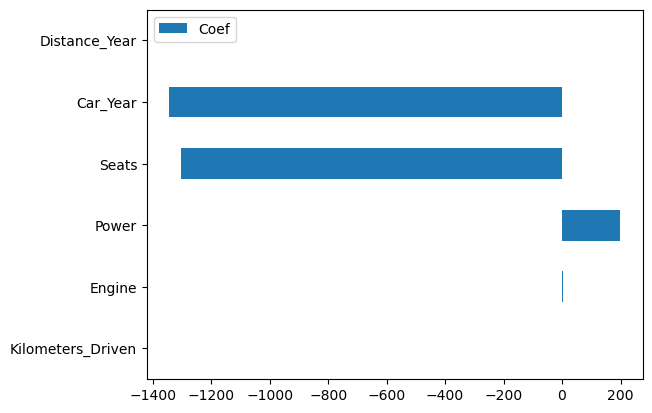

In [65]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                          index = ["Kilometers_Driven","Engine","Power","Seats","Car_Year", "Distance_Year"])
df_reg_coef.plot.barh(y = "Coef")

--------------

In [66]:
# Price와 Brand간의 관계를 알기 위햐여 Brand 만 가지고 회귀분석 시행
formula =  'Price ~  Brand_Ambassador +  Brand_Audi +  Brand_BMW +\
        Brand_Chevrolet +  Brand_Datsun +  Brand_Fiat +  Brand_Force +\
        Brand_Ford +  Brand_Honda +  Brand_Hyundai +  Brand_ISUZU +\
        Brand_Jaguar +  Brand_Jeep +  Brand_Land +  Brand_Mahindra +\
        Brand_Maruti +  Brand_Benz +  Brand_Mitsubishi +\
        Brand_Nissan +  Brand_Porsche +  Brand_Renault +  Brand_Skoda +\
        Brand_Smart +  Brand_Tata +  Brand_Toyota +  Brand_Volkswagen +\
        Brand_Volvo'

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     200.8
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        11:16:30   Log-Likelihood:                -39777.
No. Observations:                3714   AIC:                         7.961e+04
Df Residuals:                    3688   BIC:                         7.977e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.998e+04   2719.579  

<Axes: >

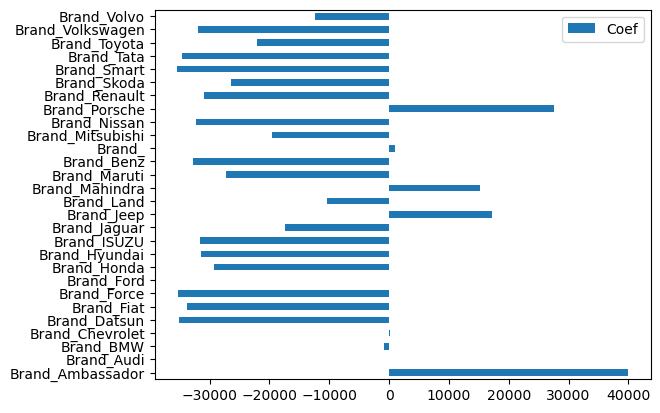

In [67]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[0:]},
                          index = [ 'Brand_Ambassador', 'Brand_Audi', 'Brand_BMW',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Benz', 'Brand_', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Smart', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo'])
df_reg_coef.plot.barh(y = "Coef")

---------------------------

In [68]:
formula =  'Price ~    Location_Ahmedabad +  Location_Bangalore +\
        Location_Chennai +  Location_Coimbatore +  Location_Delhi +\
        Location_Hyderabad +  Location_Jaipur +  Location_Kochi +\
        Location_Kolkata +  Location_Mumbai +  Location_Pune'

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     23.64
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.14e-43
Time:                        11:16:31   Log-Likelihood:                -41257.
No. Observations:                3714   AIC:                         8.254e+04
Df Residuals:                    3703   BIC:                         8.260e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.317e+04    

<Axes: >

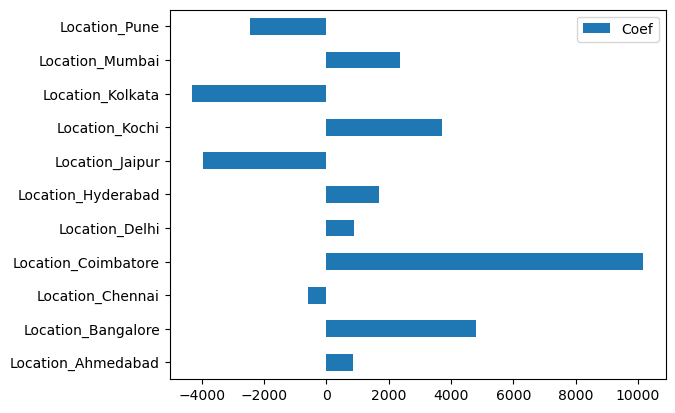

In [69]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                          index = ['Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune'])
df_reg_coef.plot.barh(y = "Coef")

--------------

In [70]:
formula =  'Price ~    Fuel_Type_CNG +\
        Fuel_Type_Diesel +  Fuel_Type_Electric +  Fuel_Type_LPG +\
        Fuel_Type_Petrol'

reg_model = smf.ols(formula, data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     121.7
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.11e-97
Time:                        11:16:31   Log-Likelihood:                -41143.
No. Observations:                3714   AIC:                         8.230e+04
Df Residuals:                    3709   BIC:                         8.233e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9666.9262   2830

<Axes: >

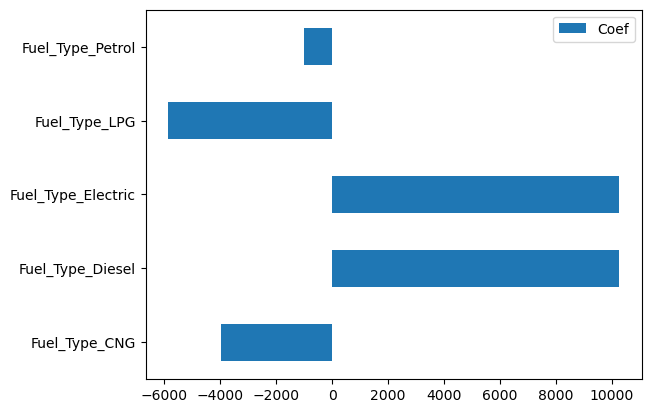

In [71]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                          index = ['Fuel_Type_CNG','Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG','Fuel_Type_Petrol'])
df_reg_coef.plot.barh(y = "Coef")

-----------

In [72]:
# 선형 회귀 분석 이용, 상소항 자동추기
# 위에서 Brand, Location, Fuel_Type의 VIF값이 매우 높았으므로 제거하고 회귀분석 시행
reg_model = smf.ols(formula='Price ~ Kilometers_Driven + Engine + Power + Seats + Car_Year', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1481.
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        11:16:31   Log-Likelihood:                -39334.
No. Observations:                3714   AIC:                         7.868e+04
Df Residuals:                    3708   BIC:                         7.872e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7597.0270   1274.52

<Axes: >

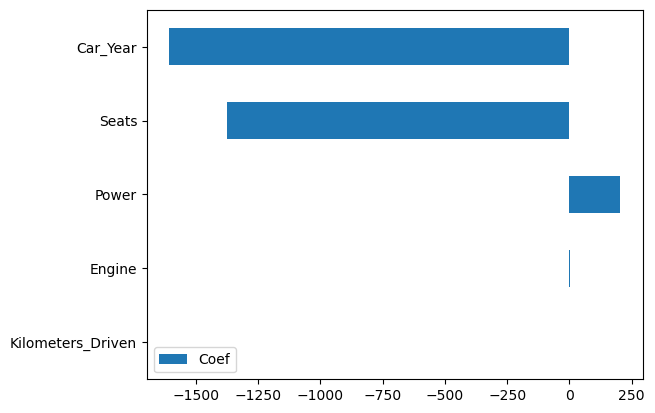

In [73]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                          index = ["Kilometers_Driven","Engine","Power","Seats","Car_Year"])
df_reg_coef.plot.barh(y = "Coef")

# Scale

In [74]:
df_char = df_raw.select_dtypes(include = 'object')
df_numeric = df_raw.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,Price,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Year,Distance_Year,Brand,Location,Fuel_Type,Transmission,Owner_Type
0,-0.707450,0.153028,1.978395,-1.056712,-1.055771,-0.350822,1.050911,-0.044460,Maruti,Mumbai,CNG,Manual,First
1,0.256657,-0.190827,0.307021,-0.056219,0.259026,-0.350822,-0.477799,-0.073690,Hyundai,Pune,Diesel,Manual,First
2,-0.460818,-0.135366,-0.047512,-0.712364,-0.465620,-0.350822,0.745169,-0.165005,Honda,Chennai,Petrol,Manual,First
3,-0.326291,0.319410,0.572319,-0.628418,-0.464460,2.144587,0.439427,0.123132,Maruti,Chennai,Diesel,Manual,First
4,0.726604,-0.194487,-0.771051,0.605066,0.541154,-0.350822,0.133685,-0.148486,Audi,Coimbatore,Diesel,Automatic,Second


In [75]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size=0.3, random_state=1234)

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (3714, 58)
test data size : (2477, 58)


In [76]:
#선형 회귀 분석 이용, 상소항 자동추기
reg_model = smf.ols(formula='Price ~ Kilometers_Driven + Engine + Power + Seats + Car_Year', data=df_scaled_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1681.
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        11:16:32   Log-Likelihood:                -3688.1
No. Observations:                4333   AIC:                             7388.
Df Residuals:                    4327   BIC:                             7426.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0052      0.00

In [77]:
# 설명변수간의 다중공산성 재확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_scaled_train[['Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Car_Year']]

# statsmodels 의 상수항 추가 함수 적용
df_train_x_const = sm.add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values,i)
                for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
0,const,1.00
1,Kilometers_Driven,1.03
5,Car_Year,1.05
4,Seats,1.68
3,Power,5.06
2,Engine,6.09


<Axes: >

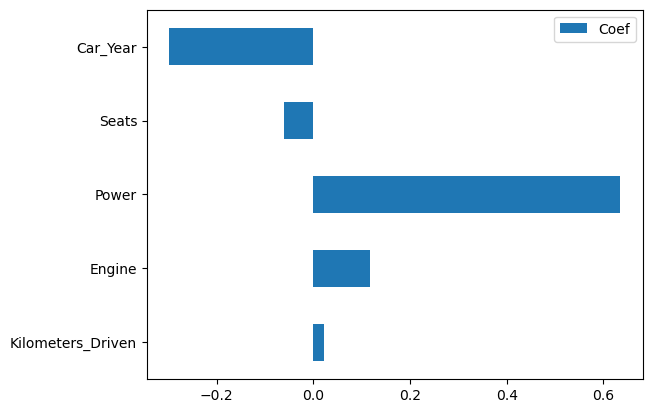

In [78]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                          index = ["Kilometers_Driven","Engine","Power","Seats","Car_Year"])
df_reg_coef.plot.barh(y = "Coef")

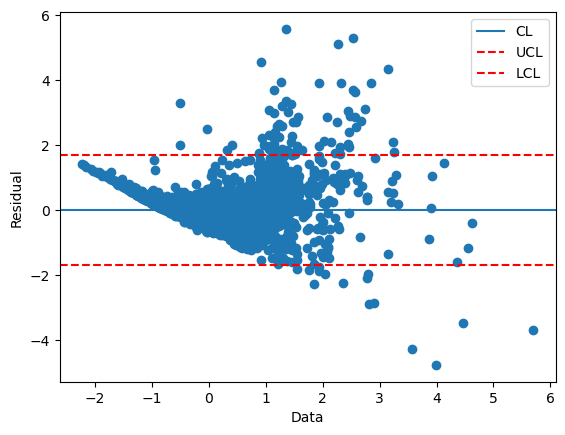

In [79]:
# 회귀 모델 잔차의 가정 확인

#잔차 산점도: X  - 예측값, Y - 잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0, linestyle='-', label='CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle='--', color = 'red', label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle='dashed', color = 'red', label='LCL')
plt.legend()
plt.show()

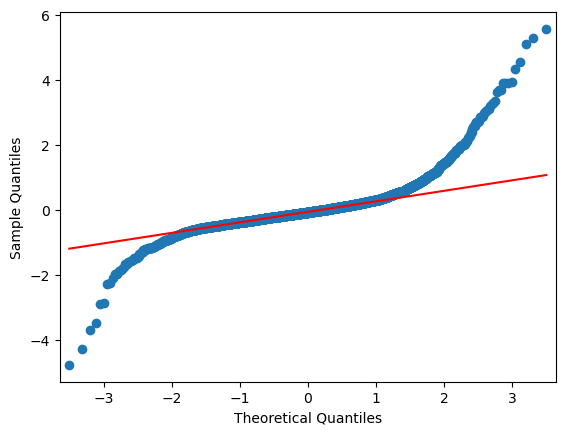

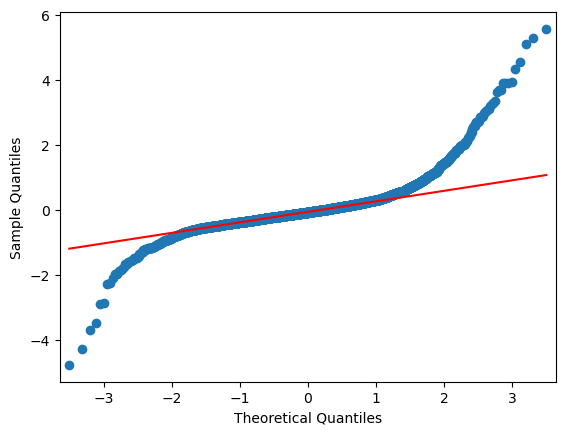

In [80]:
# 잔차 정규성 검정 qqplot, s-standardized line,
qqplot(reg_result.resid, line='q')

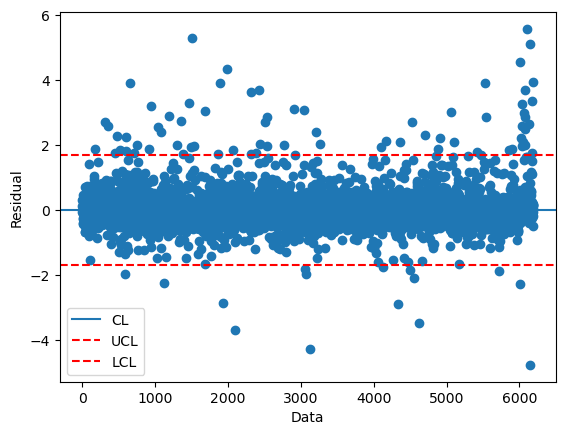

In [81]:
# 잔차의 독립성 확인
plt.scatter(df_scaled_train.index, reg_result.resid)
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-",label="CL")
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label="UCL")
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label="LCL")
plt.legend()

-----------------

# 의사결정나무

In [82]:
# 브랜드는 더미화 할 경우 경우의 수가 너무 많아져 제외
df_dummy = pd.get_dummies(df_raw[["Location", "Fuel_Type", "Transmission","Owner_Type"]])
df_dummy.head()

df_tree = pd.concat([df_raw, df_dummy], axis = 1)
df_tree = df_tree.drop(["Location", "Fuel_Type", "Transmission","Owner_Type", "Brand"], axis = 1)
df_tree.head()

# 데이터 분리(Y, Xs) - > 설명변수를 이용한 주성분 분석
df_raw_y = df_tree["Price"]
df_raw_x = df_tree.drop("Price",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train dzta X size : {}".format(df_train_x.shape))
print("train dzta Y size : {}".format(df_train_y.shape))
print("test dzta X size : {}".format(df_test_x.shape))
print("test dzta Y size : {}".format(df_test_y.shape))

train dzta X size : (3714, 29)
train dzta Y size : (3714,)
test dzta X size : (2477, 29)
test dzta Y size : (2477,)


In [83]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.760


In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {
    "max_depth": sp_randint(1, 20),
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(1, 20),
    "max_features": [1.0],
    "criterion": ['mse', 'friedman_mse', 'mae']
}

dt = DecisionTreeRegressor()

random_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=3, scoring="r2", random_state=42)
random_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_dt.best_estimator_))
print("\nbest parameter: \n{}".format(random_dt.best_params_))
print("\nbest score: \n{}".format(random_dt.best_score_.round(3)))


best estimator model: 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=1.0,
                      min_samples_leaf=12, min_samples_split=7)

best parameter: 
{'criterion': 'friedman_mse', 'max_depth': 2, 'max_features': 1.0, 'min_samples_leaf': 12, 'min_samples_split': 7}

best score: 
0.617


In [85]:
# tree_final = DecisionTreeRegressor(min_samples_leaf=12,min_samples_split=7,max_depth=2, random_state=1234,)
# tree_final.fit(df_train_x, df_train_y)

# print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))


tree_final = DecisionTreeRegressor(min_samples_leaf=7,min_samples_split=12,max_depth=4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)


print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))


Score on training set: 0.792
Score on test set: 0.779


In [86]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
3,Power,0.798
5,Car_Year,0.176
4,Seats,0.010
1,Mileage,0.008
2,Engine,0.005
23,Transmission_Automatic,0.003
0,Kilometers_Driven,0.000
22,Fuel_Type_Petrol,0.000
19,Fuel_Type_Diesel,0.000
20,Fuel_Type_Electric,0.000


Text(0, 0.5, '변수')

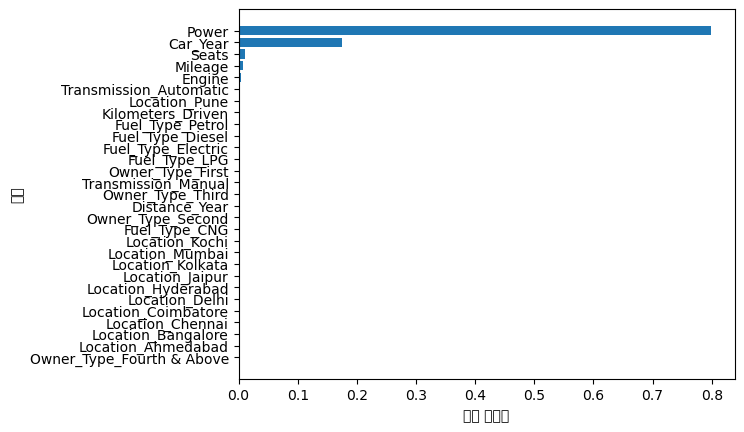

In [87]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

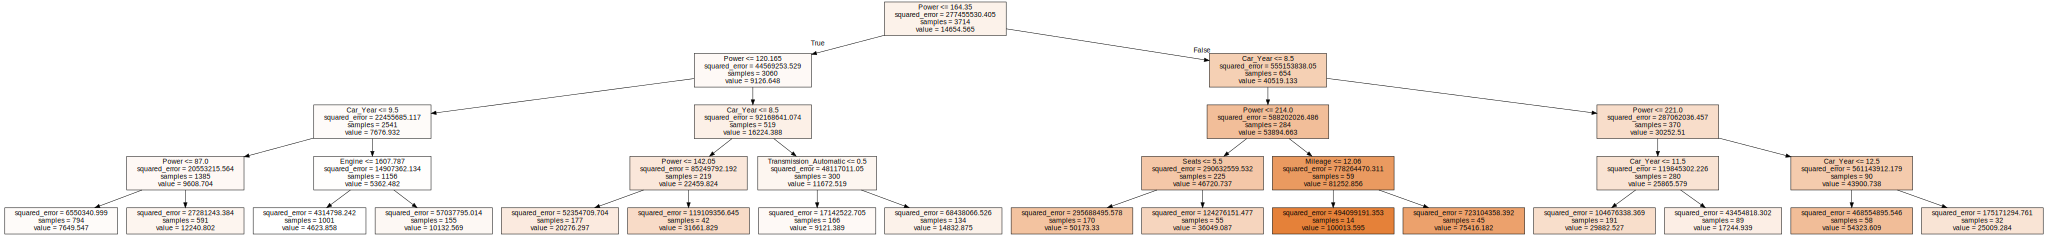

'Source.gv.pdf'

In [88]:
v_feature_name = df_train_x.columns

export_graphviz(tree_final, out_file = "tree_final.dot",
               feature_names= v_feature_name, impurity=True,filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))
#fixed_dot_graph = "digraph Tree {\nsize=\"10,10\";\n" + dot_graph.split('{', 1)[1]

src = graphviz.Source(dot_graph)
src.view()


# 랜덤포레스트

In [89]:
df_dummy = pd.get_dummies(df_raw[["Location", "Fuel_Type", "Transmission","Owner_Type"]])
df_dummy.head()

df_rf = pd.concat([df_raw, df_dummy], axis = 1)
df_rf = df_rf.drop(["Location", "Fuel_Type", "Transmission","Owner_Type", "Brand"], axis = 1)
df_rf.head()

# 데이터 분리(Y, Xs) - > 설명변수를 이용한 주성분 분석
df_raw_y = df_rf["Price"]
df_raw_x = df_rf.drop("Price",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train dzta X size : {}".format(df_train_x.shape))
print("train dzta Y size : {}".format(df_train_y.shape))
print("test dzta X size : {}".format(df_test_x.shape))
print("test dzta Y size : {}".format(df_test_y.shape))

train dzta X size : (3714, 29)
train dzta Y size : (3714,)
test dzta X size : (2477, 29)
test dzta Y size : (2477,)


In [90]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.981
Score on test set: 0.840


In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {
    "max_depth": sp_randint(1, 20),
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(1, 20),
    "max_features": [1.0],
    "bootstrap": [True, False],
    "criterion": ['absolute_error', 'friedman_mse']
}

rf = RandomForestRegressor(n_estimators=100)

random_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, scoring="r2", random_state=42)
random_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_rf.best_estimator_))
print("\nbest parameter: \n{}".format(random_rf.best_params_))
print("\nbest score: \n{}".format(random_rf.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_leaf=11, min_samples_split=9)

best parameter: 
{'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 15, 'max_features': 1.0, 'min_samples_leaf': 11, 'min_samples_split': 9}

best score: 
0.829


In [92]:
rf_final = RandomForestRegressor(min_samples_leaf = 11, min_samples_split = 9,
                                max_depth = 15, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

# train 데이터의 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))

# test 데이터의 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))

rf_final

Score on training set: 0.884
Score on test set: 0.833


RandomForestRegressor(max_depth=15, min_samples_leaf=11, min_samples_split=9,
                      random_state=1234)

In [93]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
3,Power,0.757
5,Car_Year,0.173
2,Engine,0.019
1,Mileage,0.019
0,Kilometers_Driven,0.014
6,Distance_Year,0.004
4,Seats,0.004
23,Transmission_Automatic,0.004
24,Transmission_Manual,0.003
22,Fuel_Type_Petrol,0.001


Text(0, 0.5, '변수')

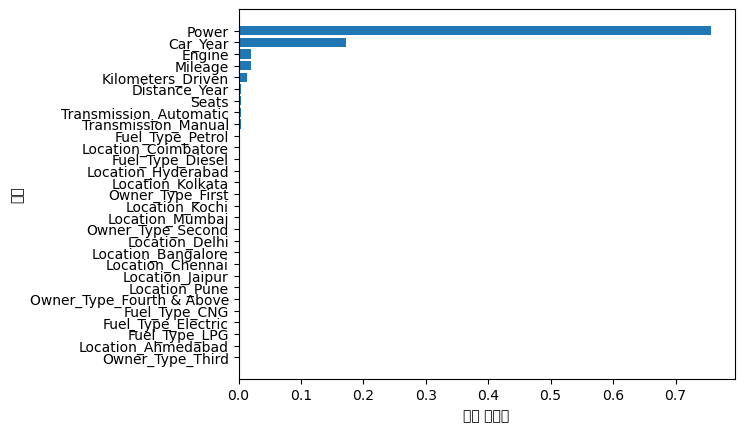

In [94]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 그라디언트 부스팅

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [96]:
df_dummy = pd.get_dummies(df_raw[["Location", "Fuel_Type", "Transmission","Owner_Type"]])
df_dummy.head()

df_gb = pd.concat([df_raw, df_dummy], axis = 1)
df_gb = df_gb.drop(["Location", "Fuel_Type", "Transmission","Owner_Type", "Brand"], axis = 1)
df_gb.head()

# 데이터 분리(Y, Xs) - > 설명변수를 이용한 주성분 분석
df_raw_y = df_gb["Price"]
df_raw_x = df_gb.drop("Price",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train dzta X size : {}".format(df_train_x.shape))
print("train dzta Y size : {}".format(df_train_y.shape))
print("test dzta X size : {}".format(df_test_x.shape))
print("test dzta Y size : {}".format(df_test_y.shape))

train dzta X size : (3714, 29)
train dzta Y size : (3714,)
test dzta X size : (2477, 29)
test dzta Y size : (2477,)


In [97]:
# 모델 생성 : GradientboostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))

# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.921
Score on test set: 0.828


In [98]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    "max_depth": sp_randint(1, 20),
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(1, 20),
    "max_features": uniform(0.01, 1.0),
    "alpha": uniform(0.01, 1.0),
    "learning_rate": uniform(0.01, 1.0),
}

gb = GradientBoostingRegressor(n_estimators=100)

random_gb = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=3, scoring="r2", random_state=42)
random_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_gb.best_estimator_))
print("\nbest parameter: \n{}".format(random_gb.best_params_))
print("\nbest score: \n{}".format(random_gb.best_score_.round(3)))


best estimator model: 
GradientBoostingRegressor(alpha=0.5242344384136116,
                          learning_rate=0.6024145688620425,
                          max_features=0.8699404067363206, min_samples_leaf=7,
                          min_samples_split=10)

best parameter: 
{'alpha': 0.5242344384136116, 'learning_rate': 0.6024145688620425, 'max_depth': 3, 'max_features': 0.8699404067363206, 'min_samples_leaf': 7, 'min_samples_split': 10}

best score: 
0.867


In [108]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=100, min_samples_leaf=7,
                                min_samples_split=7, max_depth=4, learning_rate=0.6)

gb_final.fit(df_train_x, df_train_y)

# train 데이터의 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))

# test 데이터의 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))


Score on training set: 0.983
Score on test set: 0.843


In [100]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
3,Power,0.757
5,Car_Year,0.173
2,Engine,0.019
1,Mileage,0.019
0,Kilometers_Driven,0.014
6,Distance_Year,0.004
4,Seats,0.004
23,Transmission_Automatic,0.004
24,Transmission_Manual,0.003
22,Fuel_Type_Petrol,0.001


Text(0, 0.5, '변수')

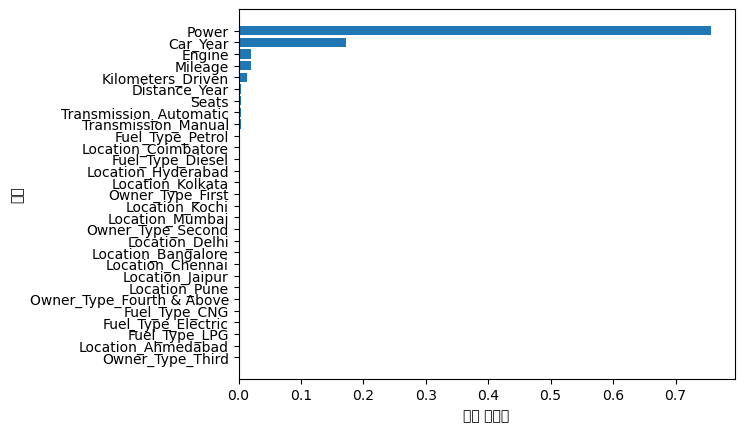

In [101]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

--------

# 평가

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)) * 100

In [103]:
# 모델 리스트, 그래프를 그리기 위한 생성 목적 
models = ["Decision Tree", "Random Forest", "Gradient Boosting"]

# 평가 리스트 초기화 
mse, rmse, mae, mape = [], [], [], []

In [104]:
# 2) Decision Tree

# 예측
df_y_pred = tree_final.predict(df_test_x)

# 평가 
mse.append(mean_squared_error(df_test_y, df_y_pred))
rmse.append(root_mean_squared_error(df_test_y, df_y_pred))
mae.append(mean_absolute_error(df_test_y, df_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, df_y_pred))

In [105]:
# 3) Random Forest

# 예측
rf_y_pred = rf_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [106]:
# 4) Gradient Boosting

# 예측
gb_y_pred = gb_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

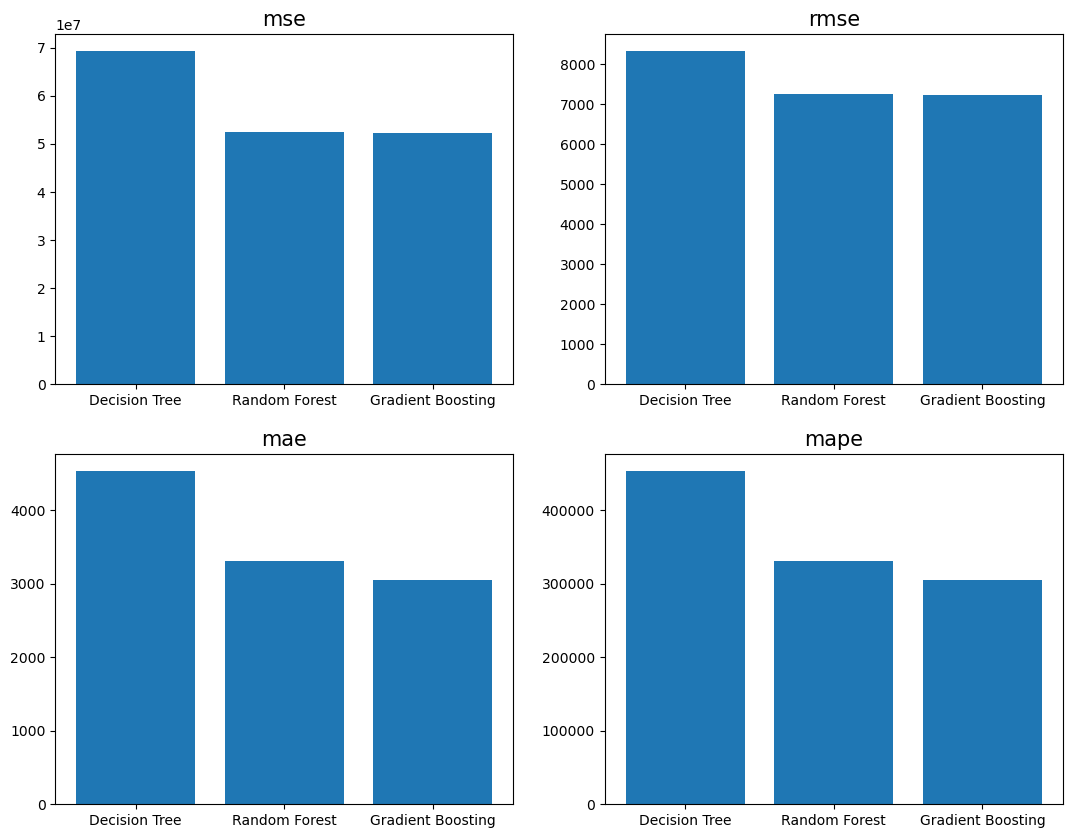

In [107]:
fig, ax = plt.subplots(2,2, figsize = (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)